In [1]:
# %pip install Pillow
# %pip install pydicom
# %pip install scipy

# %pip install shutil

# %pip install nibabel

# %pip install numpy

# %pip install imageio

# !chmod +x nii2png

# pip install nii2png as nii2

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

Getting No of Cases

In [36]:
# df = os.listdir('/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train')
# len(df)

Downloading the library for the conversion of dcm to niix

In [37]:
# !apt-get update
# !apt-get install -y dcm2niix
labels_df=pd.read_csv("/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv")

# print(labels_df.dtypes)  # Check data types
# print(labels_df.head())  # Check sample data


In [ ]:
import os
import numpy as np
import pydicom
from PIL import Image

from sklearn.model_selection import train_test_split

import pandas as pd


# Split data into training and validation sets
# X_train, X_val, y_train, y_val = train_test_split(images,label, test_size=0.2, random_state=42)

# Define image size and number of modalities
IMAGE_SIZE = (256, 256)
MODALITIES = ['T1w']  # List of modalities

# Load DICOM images from each modality
def load_dicom_images(data_dir,labels_df, output_path,modalities, target_size):
    images = []
    labels = []
    count=0
#     print(label_df)
        # Load from each modality
    for case in os.listdir(data_dir):
        case_id = str(case)  # Extract case ID from the folder name
        if len(case_id)<5:
            case_id=(5-len(case_id))*"0" + case_id
        print(case_id)
#         print(labels_df[labels_df['BraTS21ID'] == 00000]['MGMT_value'],labels_df[labels_df['BraTS21ID'] == "00000"])
        case_label = labels_df[labels_df['BraTS21ID'] == int(case_id)]['MGMT_value'].values
        # Construct the full path to the DICOM file
        file_path = os.path.join(data_dir,case)
        count+=1
        # Check if the file exists
        if os.path.exists(file_path):
            # Load the DICOM file
         
            for modalitie in modalities:
                new_file_path=os.path.join(file_path,modalitie)
                for image in os.listdir(new_file_path):
                    dcm_path=os.path.join(new_file_path,image)
                    dicom_data = pydicom.dcmread(dcm_path)

                # Extract pixel data and convert to PIL Image
                    img = Image.fromarray(dicom_data.pixel_array)

                # Resize the image
                    img = img.resize(target_size)

                # Normalize the image (0-1 range)
                    img_array = np.array(img) / 255.0
                    
                    img_array = np.expand_dims(img_array, axis=-1)

                    images.append(img_array)
                    labels.append(case_label[0])
            else:
                print(f"File {dcm_path} not found. Skipping.")

                       
        else:
            print(f"File {filename} not found.")
        print(data_dir,case,"done")

    return np.array(images), np.array(labels)
# Directory containing the DICOM data
data_dir = '/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train/'
output_path='/kaggle/working/3D-mri/'
# Load the DICOM images from all modalities
images, label= load_dicom_images(data_dir,labels_df,output_path, MODALITIES, IMAGE_SIZE)

print(images.shape)


00688
File /kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00688/T1w/Image-168.dcm not found. Skipping.
/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train/ 00688 done
00058
File /kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00058/T1w/Image-17.dcm not found. Skipping.
/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train/ 00058 done
00516
File /kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00516/T1w/Image-31.dcm not found. Skipping.
/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train/ 00516 done
00185
File /kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00185/T1w/Image-168.dcm not found. Skipping.
/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train/ 00185 done
00547
File /kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train/00547/T1w/Image-168.dcm not found. Skipping.
/kaggle/input/rsna-miccai-

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(
    images, label, test_size=0.2, random_state=42, stratify=label
)


In [2]:
import numpy as np

# Save images and labels as .npy files
# np.save('X_train_256.npy', X_train)
# np.save('X_val_256.npy', X_val)
# np.save('y_train_256.npy', y_train)
# np.save('y_val_256.npy', y_val)

# print("Files saved successfully.")

X_train = np.load('/kaggle/input/numpy-dataset-for-tumor-classification/X_train.npy')
X_val = np.load('/kaggle/input/numpy-dataset-for-tumor-classification/X_val.npy')
y_train = np.load('/kaggle/input/numpy-dataset-for-tumor-classification/y_train.npy')
y_val = np.load('/kaggle/input/numpy-dataset-for-tumor-classification/y_val.npy')


Converting the niix to png image

In [ ]:
# def conver_niix_to_png(data_dire , output_path):
#     input_file=data_dire
#     main(sys.argv,input_file,output_path)
    


In [ ]:
# conver_niix_to_png("/kaggle/input/t1w-niix/3D-mri/00000/T1w_T1w_0_8.nii","/kaggle/working/")
# conver_niix_to_png("/kaggle/input/t1w-niix/3D-mri/00000/T1w_T1w_0_8.nii","/kaggle/working/")

Removing Pitch Black Images

In [ ]:
# df=pd.read_csv('/kaggle/input/rsna-miccai-brain-tumor-radiogenomic-classification/train_labels.csv')

In [ ]:
# grap=df['MGMT_value'].value_counts()
# plt.figure(figsize=(8,5))
# grap.plot(kind='bar')

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Build a CNN model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd Convolutional Layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.0001))
# 3rd Convolutional Layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten for fully connected layers
model.add(Flatten())

# Fully connected layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.01))  # Dropout to prevent overfitting

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
# Train the model
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=60,
    batch_size=126,
    validation_data=(X_val, y_val)
)

Epoch 1/60


I0000 00:00:1728899710.519281      76 service.cc:145] XLA service 0x7fb34c00bbe0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728899710.519327      76 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


 21/493 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4973 - loss: 0.7049

I0000 00:00:1728899715.802277      76 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


493/493 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.5418 - loss: 0.6869 - val_accuracy: 0.5749 - val_loss: 0.6659
Epoch 2/60
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.5781 - loss: 0.6609 - val_accuracy: 0.6009 - val_loss: 0.6434
Epoch 3/60
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6092 - loss: 0.6355 - val_accuracy: 0.6384 - val_loss: 0.6114
Epoch 4/60
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6425 - loss: 0.6017 - val_accuracy: 0.6607 - val_loss: 0.5884
Epoch 5/60
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6660 - loss: 0.5709 - val_accuracy: 0.6755 - val_loss: 0.5615
Epoch 6/60
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6876 - loss: 0.5428 - val_accuracy: 0.6877 - val_loss: 0.5449
Epoch 7/60
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6992 - loss: 0.5215 - val_accuracy: 0.6794 - val_loss: 0.5290
Epoch 8/60
493/493 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7183 - loss: 0.4958 - val_accuracy: 0.7131 - va

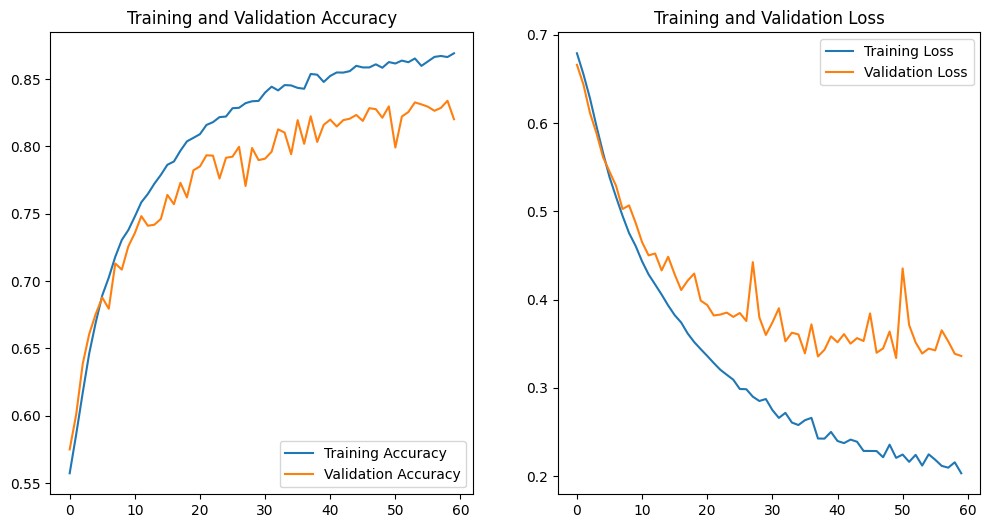

In [5]:
import matplotlib.pyplot as plt
# Plot training and validation accuracy/loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Save the model
model.save('multi_modality_tumor_detection_model.h5')

In [44]:
from PIL import Image
import numpy as np

# Save the first image from the array to disk
def save_image(image_array, file_path="/kaggle/working/sample_image1.png"):
    image_array.shape
    # Ensure it's in the right shape (height, width) or (height, width, channels)
    # Grayscale (64, 64, 1)
    image_array = image_array.squeeze()  # Convert to (64, 64)
    img = Image.fromarray((image_array * 255).astype(np.uint8), mode='L')  # 'L' for grayscale


    img.save(file_path)
    print(f"Image saved at {file_path}")

# Save the image
save_image(X_val[50])
X_val[50].shape

Image saved at /kaggle/working/sample_image1.png


(64, 64)

In [45]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def preprocess_image(file_path):
    # Load the saved image and resize it (assuming 64x64, adjust if needed)
    img = load_img(file_path, color_mode="grayscale", target_size=(64, 64))
    
    # Convert the image to a NumPy array and normalize pixel values
    img_array = img_to_array(img) / 255.0  # Normalize to [0, 1]
    
    # Expand dimensions to match model input shape (1, 64, 64, 3) or (1, 64, 64, 1)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Preprocess the image
img_array = preprocess_image("/kaggle/working/sample_image1.png")


In [46]:
# Make a prediction
prediction = model.predict(img_array)

# Convert the prediction to a class label (0 or 1)
predicted_label = np.argmax(prediction, axis=1)[0]
print(f"Predicted Label: {predicted_label}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted Label: 0


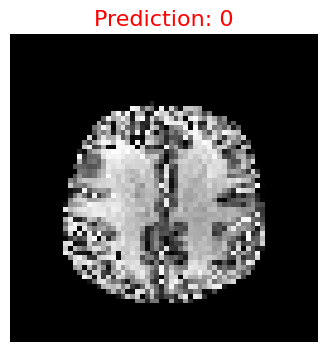

In [48]:
def visualize_prediction(file_path, predicted_label):
    # Load the saved image for display
    img = load_img(file_path)
    
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f"Prediction: {predicted_label}", fontsize=16, color='red')
    plt.axis('off')
    plt.show()

# Visualize the prediction on the image
visualize_prediction("/kaggle/working/sample_image1.png", predicted_label)
